1e-10
0.057845236589439096
0.06303429127902753
0.05050945176226006
0.05236839883554836
0.051897117599320586
1e-10
0.06840161383217662
0.04900976652494438
0.06583574402530407
1e-10
0.06327271040862564
1e-10
0.04457177568169539
0.0608863162771679
1e-10
0.05937863268661906
0.05262108007587781
1e-10
0.07271296332327523
0.059874588420582756
0.05429136086931652
0.0658910635021813
0.07010689212920472
0.050685876532014805
0.04758262755053912
0.045089228757136994
0.0565684663757405
28
0.05626835961081527
0.05488392913331533
0.06098655352173993
0.05927900415484583
0.05294003833226863
0.05694631874198924
1e-10
0.04748870727996289
0.053178698128657415
0.06253460790985521
0.058967665510030104
0.04513476925344273
0.06812071080435583
0.06188530844940196
1e-10
0.057469627941714695
0.04970034241250378
1e-10
0.060407374090271526
0.06451665540929898
0.054165758384882474
0.05399590019074345
0.04969319378218006
1e-10
0.06567079088224437
1e-10
0.0512918021834843
1e-10
28
0.06553017125630663
0.05929421453548

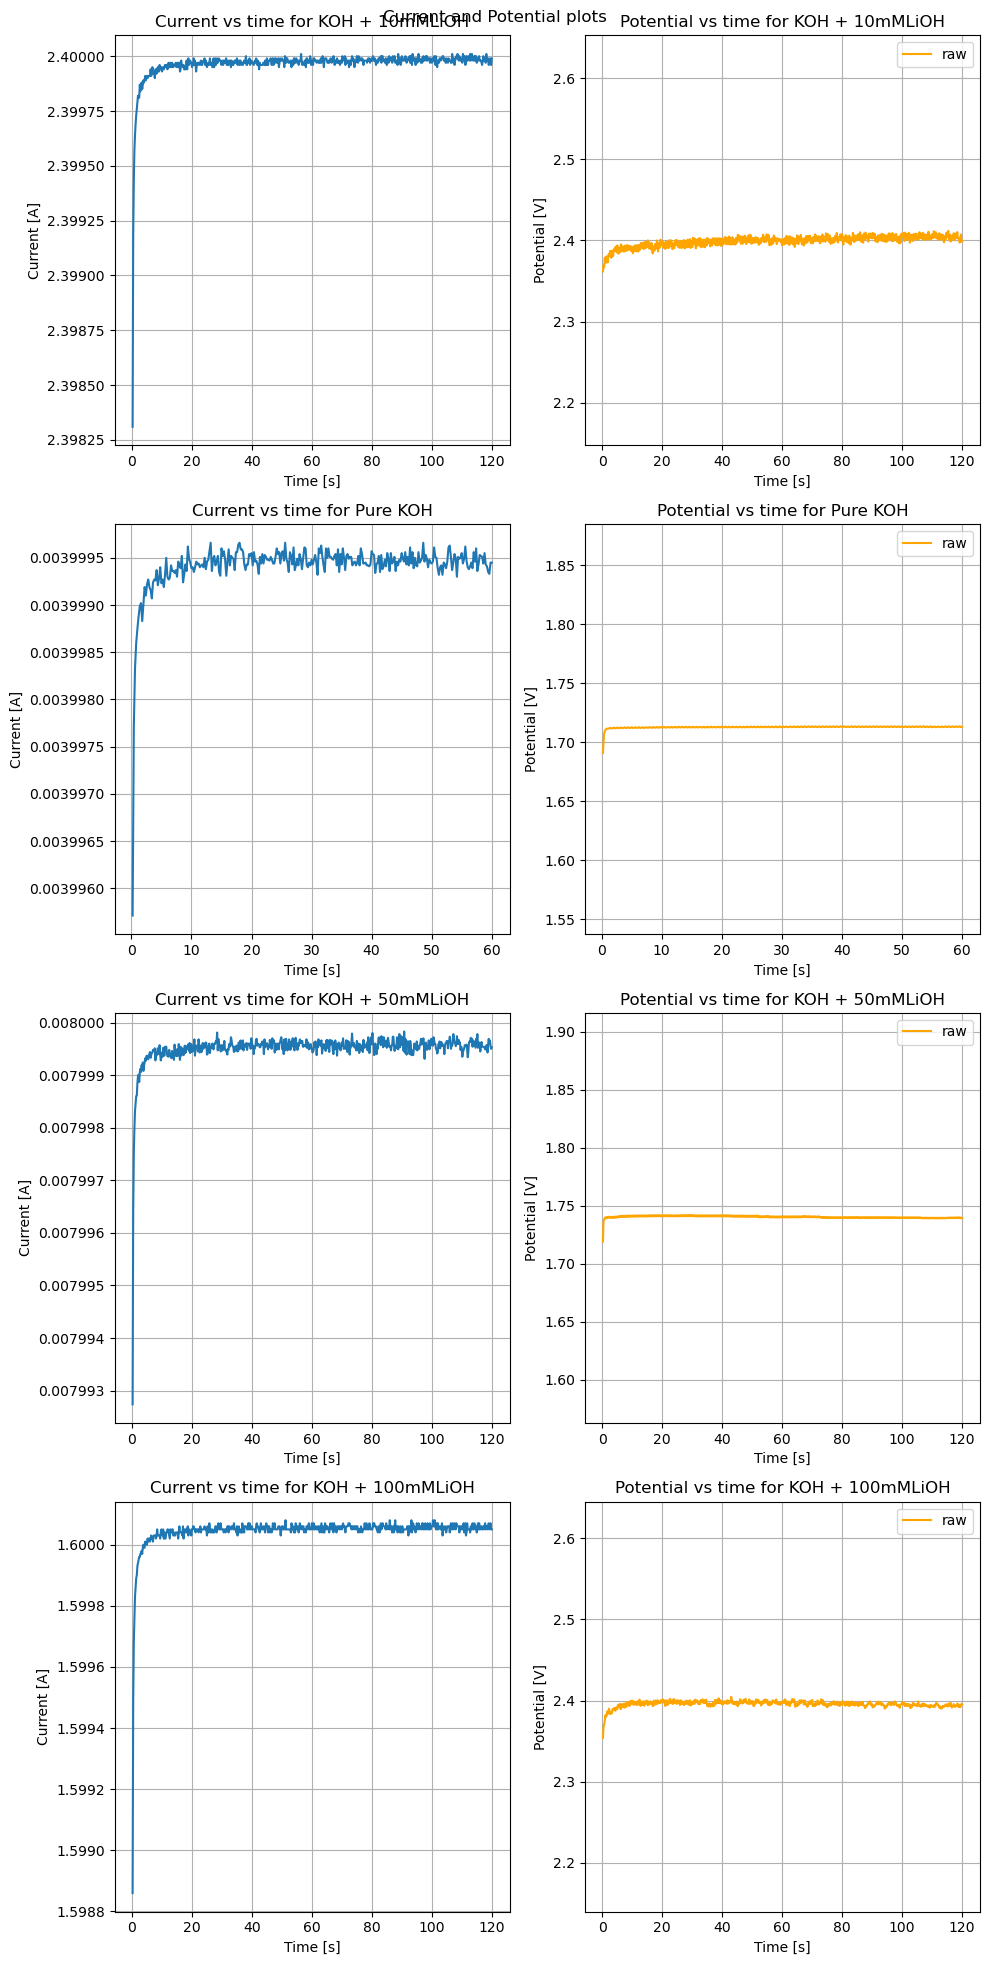

In [16]:
from ProcessingClass import Measurement
import matplotlib.pyplot as plt
import numpy as np





datetimes_start = [(2024, 11, 15, 16,  0, 0), (2024, 11, 15, 12,  0, 0), (2024, 11, 19, 12,  0, 0), (2024, 11, 22, 12,  0, 0)]
datestimes_end =  [(2024, 11, 15, 18, 30, 0), (2024, 11, 15, 13, 30, 0), (2024, 11, 19, 14, 30, 0), (2024, 11, 22, 14, 30, 0)]

foldernames = ['experiment 2 6.5M KOH 10mM LiOH', 
               'experiment1 6.5M KOH', 
               'exp3- 6.5MKOHplus50mM LiOH', 
               'experiment 5- 6.mKOHplus100mM LiOH']

nice_titles = ['KOH + 10mMLiOH', 
               'Pure KOH', 
               'KOH + 50mMLiOH', 
               'KOH + 100mMLiOH']
experiments = []

for idx in range(len(foldernames)):
    exp = Measurement(datetimes_start[idx], datestimes_end[idx], foldernames[idx])
    experiments.append(exp)

fig, ax = plt.subplots(ncols = 2, nrows = len(experiments), figsize = (10, 5*len(experiments)))
ax = ax.flatten()
for i in range(max(1,len(experiments))):
    exp = experiments[i]
    data = exp.TRScans[0]
    fig.suptitle('Current and Potential plots')
    ax[i*2].set_title('Current vs time for ' + nice_titles[i])
    ax[i*2].plot(data['time'], data['I'])
    ax[i*2].grid()
    ax[i*2].set_xlabel('Time [s]')
    ax[i*2].set_ylabel('Current [A]')
    ax[i*2+1].set_title('Potential vs time for ' + nice_titles[i])
    ax[i*2+1].plot(data['time'], data['V'], label = 'raw', color = 'orange')
    ax[i*2+1].grid()
    ax[i*2+1].set_xlabel('Time [s]')
    ax[i*2+1].set_ylabel('Potential [V]')
    ax[i*2+1].legend()
    ax[i*2+1].set_ylim(min(data['V'])/1.1, max(data['V'])*1.1)

fig.tight_layout()

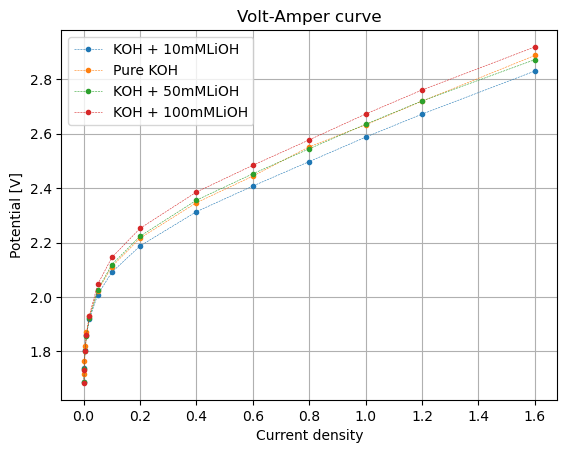

In [17]:
for i in range(max(1,len(experiments))):
    exp = experiments[i]
    exp.VAC_dataframe.sort_values(by = 'J')
    plt.plot(exp.VAC_dataframe['J'], exp.VAC_dataframe['V'], label = nice_titles[i],  marker = '.', linestyle = '--', lw = 0.4)


plt.grid(which='both')
plt.title('Volt-Amper curve')
plt.xlabel('Current density')
plt.ylabel('Potential [V]')
plt.legend()

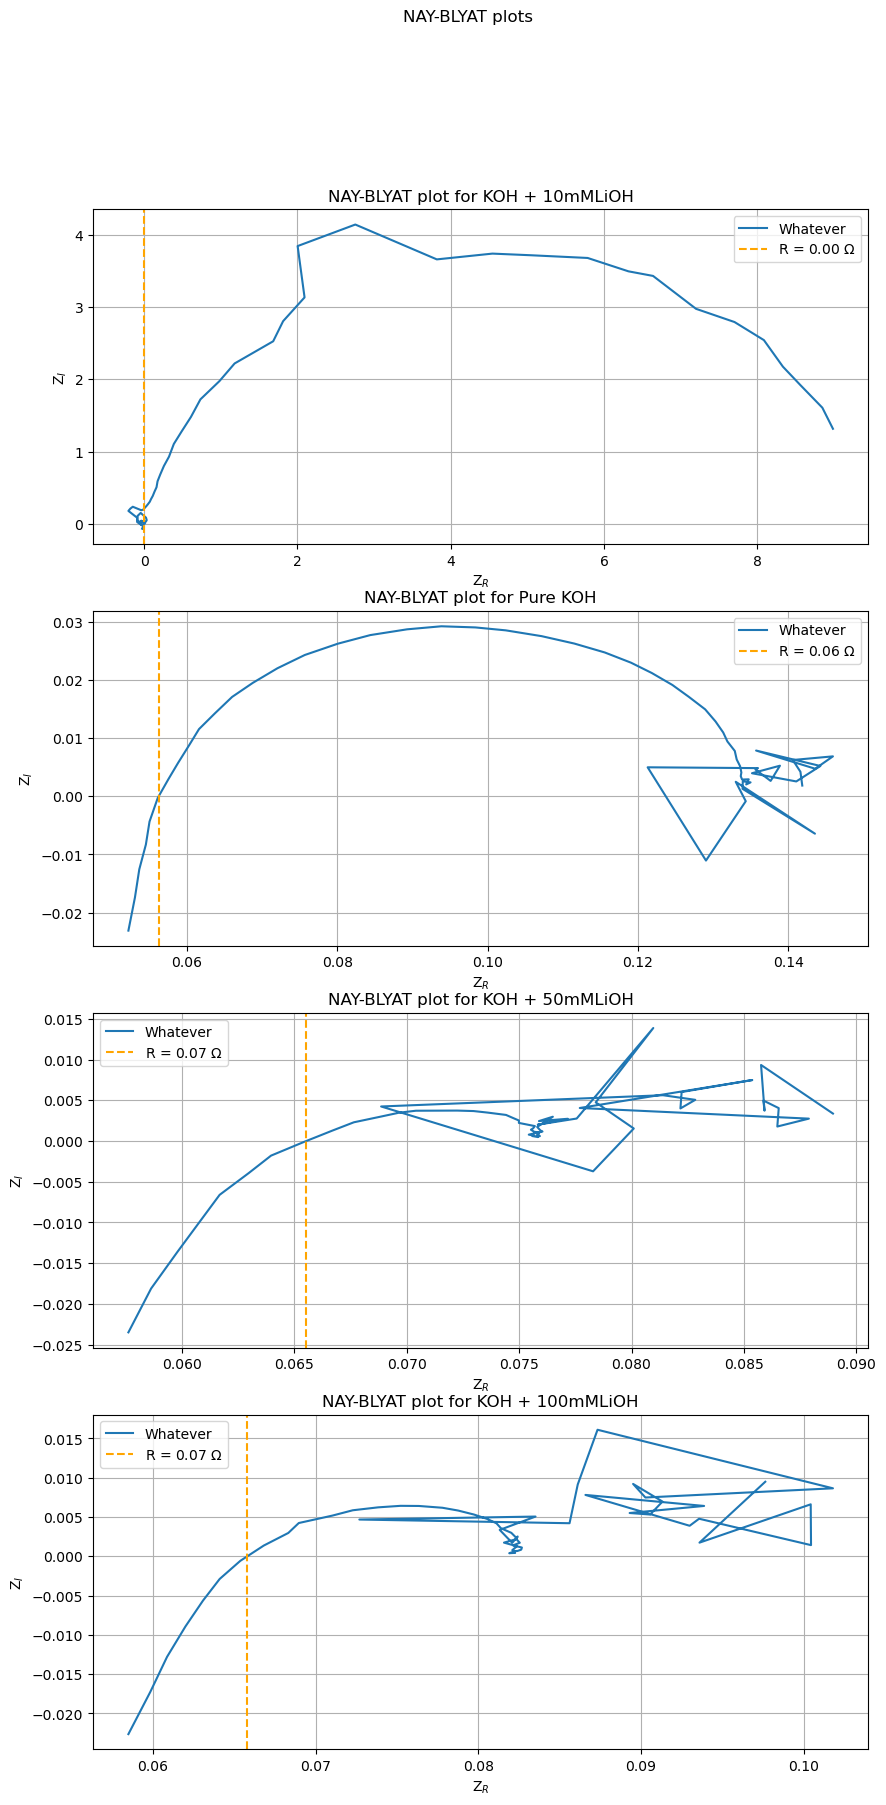

In [18]:
fig, ax = plt.subplots(nrows = len(experiments), figsize = (10, 5*len(experiments)))


#SPELL IT FOR ME PLS
fig.suptitle('NAY-BLYAT plots')



for i in range(max(1,len(experiments))):
    exp = experiments[i]
    data = exp.ZZplots[0]
    

    #Here too
    ax[i].set_title('NAY-BLYAT plot for ' + nice_titles[i])
    ax[i].plot(data['Zr'], data['Zi'],  label = 'Whatever')
    ax[i].grid()
    ax[i].set_xlabel('Z$_R$')
    ax[i].set_ylabel('Z$_I$')
    ax[i].axvline(exp.rs[0], label = f'R = {exp.rs[0]:.2f} $\\Omega$', color = 'orange', linestyle = '--')
    ax[i].legend()



Text(0, 0.5, 'Ohmic resistance [$\\Omega$]')

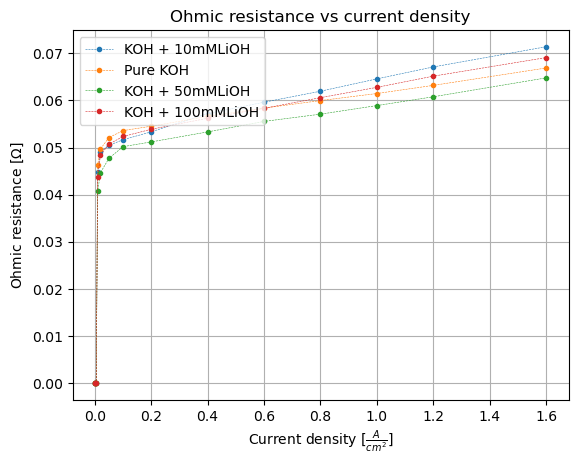

In [19]:
for i in range(max(1,len(experiments))):
    exp = experiments[i]
    exp.JR_dataframe.sort_values(by = 'J')
    plt.plot(exp.JR_dataframe['J'], exp.JR_dataframe['R'], label = nice_titles[i], marker = '.', linestyle = '--', lw = 0.4)

plt.grid(which='both')
plt.legend(loc = 'upper left')
plt.title('Ohmic resistance vs current density')
plt.xlabel('Current density [$\\frac{A}{cm^2}$]')
plt.ylabel('Ohmic resistance [$\\Omega$]')

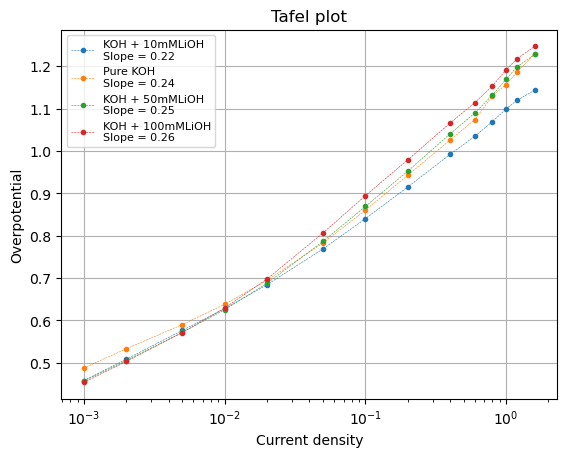

In [20]:
for i in range(max(1,len(experiments))):
    exp = experiments[i]
    exp.JR_dataframe.sort_values(by = 'J')
    plt.plot(exp.JR_dataframe['J'], exp.overpotential, label = nice_titles[i] + f'\nSlope = {exp.slope:.2f}',  marker = '.', linestyle = '--', lw = 0.4)

plt.xscale('log')
plt.grid()
plt.title('Tafel plot')
plt.xlabel('Current density')
plt.ylabel('Overpotential')
plt.legend(fontsize = 8)